# L9 Revision: Part 1 Forecasting AR(1)

## Practical aspects of making forecasts

Will look back at our Bread Price example where we found an AR(1) model an adequete fit  to the data.

## Bread Price Diagnostics

In [1]:
price <- c(5.8, 6.1, 5.4, 6.2, 5.0, 4.6, 5.8, 5.1, 5.3, 5.1, 4.8, 5.3, 6.8, 9.0, 8.6, 
9.0, 7.4, 6.4, 4.8, 3.9, 3.9, 5.6, 5.7, 7.5, 7.3, 7.4, 7.5, 9.7, 6.1, 6.0, 5.7, 5.0, 
4.2, 4.6, 5.9, 5.4, 5.4, 5.4, 5.6, 7.6, 7.4, 5.4, 5.1, 6.9, 7.5, 5.9, 6.2, 5.6, 5.8, 
5.6, 6.6, 4.8, 5.2, 4.5, 4.4, 5.3, 5.0, 6.4, 7.8, 8.5, 5.6, 7.1, 7.1, 8.0, 7.3, 5.7, 
4.8, 4.3, 4.4, 5.7, 4.7, 4.1, 4.1, 4.7, 7.0, 8.7, 6.2, 5.9, 5.4, 6.3, 4.9, 5.5, 5.4, 
4.7, 4.1, 4.6, 4.8, 4.5, 4.7, 4.8, 5.4, 6.0, 5.1, 6.5, 6.2, 4.6, 4.5, 4.0, 4.1, 4.7,
5.1, 5.2, 5.3, 4.8, 5.0, 6.2, 6.4, 4.7, 4.1, 3.9, 4.0, 4.9, 4.9, 4.8, 5.0, 4.9, 4.9, 
5.4, 5.6, 5.0, 4.5, 5.0, 7.2, 6.1)

In [2]:
# use time series function to transform it into time series format (auto indexes the t's)
BP.ts <- ts(price, start=1634, frequency = 1)

In [3]:
ar.1 <- arima(BP.ts, order=c(1,0,0))
ar.1


Call:
arima(x = BP.ts, order = c(1, 0, 0))

Coefficients:
         ar1  intercept
      0.6429     5.6608
s.e.  0.0678     0.2307

sigma^2 estimated as 0.8655:  log likelihood = -167.26,  aic = 340.52

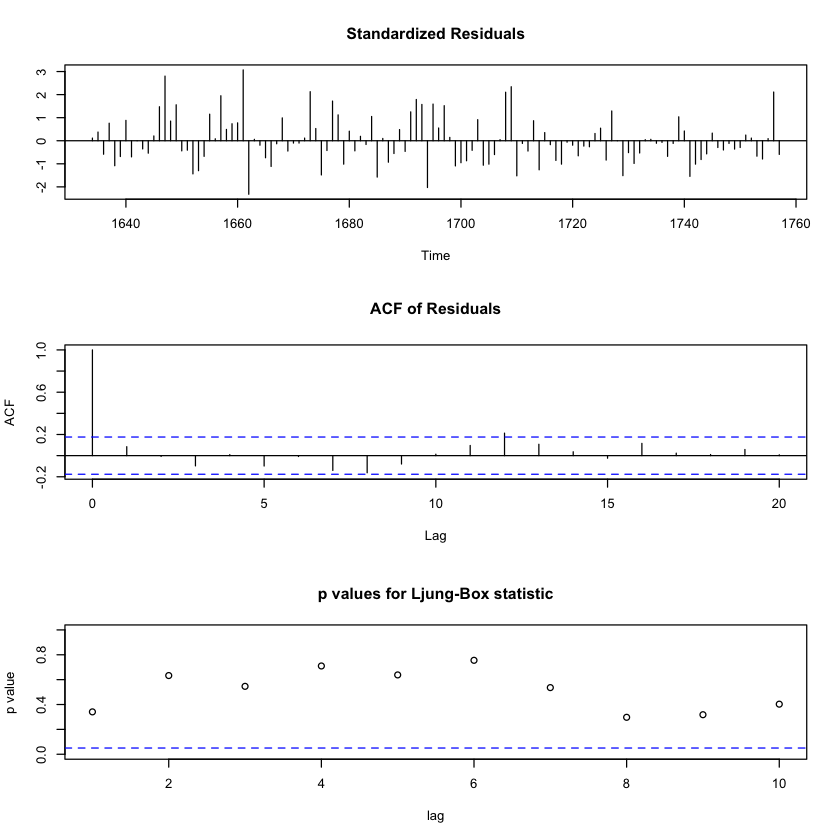

In [4]:
tsdiag(ar.1)

## This was where we'd got up to last time.

## Time to make some  forecasts.

In [8]:
print(BP.ts)

Time Series:
Start = 1634 
End = 1757 
Frequency = 1 
  [1] 5.8 6.1 5.4 6.2 5.0 4.6 5.8 5.1 5.3 5.1 4.8 5.3 6.8 9.0 8.6 9.0 7.4 6.4
 [19] 4.8 3.9 3.9 5.6 5.7 7.5 7.3 7.4 7.5 9.7 6.1 6.0 5.7 5.0 4.2 4.6 5.9 5.4
 [37] 5.4 5.4 5.6 7.6 7.4 5.4 5.1 6.9 7.5 5.9 6.2 5.6 5.8 5.6 6.6 4.8 5.2 4.5
 [55] 4.4 5.3 5.0 6.4 7.8 8.5 5.6 7.1 7.1 8.0 7.3 5.7 4.8 4.3 4.4 5.7 4.7 4.1
 [73] 4.1 4.7 7.0 8.7 6.2 5.9 5.4 6.3 4.9 5.5 5.4 4.7 4.1 4.6 4.8 4.5 4.7 4.8
 [91] 5.4 6.0 5.1 6.5 6.2 4.6 4.5 4.0 4.1 4.7 5.1 5.2 5.3 4.8 5.0 6.2 6.4 4.7
[109] 4.1 3.9 4.0 4.9 4.9 4.8 5.0 4.9 4.9 5.4 5.6 5.0 4.5 5.0 7.2 6.1


In [24]:
BP.fore <- predict(ar.1, 10)

print(BP.fore)

$pred
Time Series:
Start = 1758 
End = 1767 
Frequency = 1 
 [1] 5.943184 5.842361 5.777539 5.735862 5.709067 5.691839 5.680762 5.673641
 [9] 5.669062 5.666119

$se
Time Series:
Start = 1758 
End = 1767 
Frequency = 1 
 [1] 0.9303292 1.1060230 1.1709735 1.1967927 1.2073042 1.2116227 1.2134034
 [8] 1.2141386 1.2144425 1.2145680



## Summary

* Each prediction has a standard error associated with it.

* The standard errors are the square root of the forecast error variance, $V(h)$.

* We assume that our white noise is $\text{NID}(0, \sigma^{2})$

* This means our $Y_{T+h}$ is also normally distributed

* And this so too is the forecast error $e_{T}(h)$

* We know that $E[e_{T}(h)|H_{T}] = E[e_{T}(h)] = 0$

* And we know $\text{Var}(e_{T}(h)) = V(h)$

Therefore our error forecast:

> $e_{T}(h) \sim \text{NID}(0, V(h))$

> $\hat{y}_{T}(h)$ is our prediction for $Y_{T+h}$.

> $e_{T}(h) = Y_{T+h} - \hat{y}_{T}(h)$

Therefore:

> $Y_{T+h} = e_{T}(h) + \hat{y}_{T}(h)$

And the variance in $Y_{T+h}$ will be:

>  $\text{Var}(Y_{T+h}) = \text{Var}\left ( e_{T}(h) + \hat{y}_{T}(h) \right ) = V(h)$

Since $\hat{y}_{T}(h)$ is just a number.

So to make prediction intervals for our predictions of $Y_{T+h}$, we use:

> $\hat{y}_{T}(h) \pm z_{\alpha / 2} \times \sqrt(V(h))$

In [25]:
num.se <- qnorm(0.025, lower.tail=FALSE)
num.se

[1] 1.959964

In [26]:
pred <- BP.fore$pred
se <- BP.fore$se

print(pred)

Time Series:
Start = 1758 
End = 1767 
Frequency = 1 
 [1] 5.943184 5.842361 5.777539 5.735862 5.709067 5.691839 5.680762 5.673641
 [9] 5.669062 5.666119


In [27]:
print(se)

Time Series:
Start = 1758 
End = 1767 
Frequency = 1 
 [1] 0.9303292 1.1060230 1.1709735 1.1967927 1.2073042 1.2116227 1.2134034
 [8] 1.2141386 1.2144425 1.2145680


In [28]:
L95 <- pred - num.se*se
U95 <- pred + num.se*se

year <-  1958:1967

In [29]:
BP.PL95 <- data.frame(year, pred, L95, U95)

BP.PL95

year,pred,L95,U95
1958,5.943184,4.119772,7.766596
1959,5.842361,3.674596,8.010127
1960,5.777539,3.482473,8.072605
1961,5.735862,3.390191,8.081533
1962,5.709067,3.342794,8.075339
1963,5.691839,3.317102,8.066576
1964,5.680762,3.302535,8.058989
1965,5.673641,3.293973,8.053309
1966,5.669062,3.288799,8.049326
1967,5.666119,3.285609,8.046628


## Linking these figures to our theory.

Our estimate, $\hat{\sigma}^{2}$ ,for the white noise variance, $\sigma^{2}$ from R was: $0.8655$

Our estimate $\hat{\phi}$ for $\phi$ was: $0.6429$

And our estimate for $\hat{\mu}$ for $\mu$ was: $5.6608$

Recall, we estimate $V(1)$ to be $\hat{\sigma}^{2} = 0.8655$

Estimate for $\hat{y}_{124}(1)$:

> $\hat{y}_{124}(1) = \hat{\mu} + \hat{\phi}(\hat{y}_{124}(0) - \hat{\mu})$

> $\hat{y}_{124}(1) = \hat{\mu} + \hat{\phi}(y_{124} - \hat{\mu})$

**Making prediction for $h=1$:**

> $\hat{y}_{124}(1) = 5.6608 + 0.6429(6.1 - 5.6608) = 5.94318$

**95% probability interval for $h=1$:**

> $\hat{y}_{124}(1) \pm 1.96 \times \sqrt(V(1))$

> $\hat{y}_{124}(1) \pm 1.96 \times \sqrt(0.8655)$